# Spacery losowe po grafach: algorytm wyszukiwania klastrów

Dla dużych grafów istotną informacją jest wykrycie podgrafów, które są silnie ze sobą powiązane. Za pomocą spacerów losowych po grafach zaprojektuj algorytm, który odkrywa strukturę klastrów w grafie (clustering algorithm). Wykorzystaj swój algorytm do wskazania krytycznych wierzchołków, tj. wierzchołków, których usunięcie rozspójnia graf. Przeanalizuj wariant algorytmu dla grafów skierowanych i grafów nieskierowanych.

# Teoria

Algorytm został zaimplementowany w oparciu o [*On Clustering Using Random Walks by David Harel and Yehuda Koren*](https://www.wisdom.weizmann.ac.il/~dharel/papers/Clustering_FSTTCS.pdf)

# Implementacja

In [36]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

## Funkcje pomocnicze

In [37]:
def adj_matrix(G):
    A = nx.adjacency_matrix(G)
    A = A.todense()
    return np.array(A, dtype = np.float64)

def transition_matrix(A):
    return A / A.sum(axis=1, keepdims=True)

## Wykrywanie klastrów

In [38]:
def pk_visit(P, k):
    pk = np.array([])
    for i in range(1, k + 1):
        pk = np.append(pk, P**i)
    pk = pk.reshape(k, P.shape[0], P.shape[1])
    return pk

def pk_sum(pk, k, node):
    p = pk[0]
    for i in range(1, k):
        p += pk[i]
    return p[node]

def l1_norm(v1, v2):
    return np.sum(np.abs(v1 - v2))

def sim_k(k, v1, v2):
    return np.exp(2 * k - l1_norm(v1, v2)) - 1

def sim_mat(G, P, k, threshold):
    sim_m = np.array([])
    pk = pk_visit(P.copy(), k)
    for frm, to in G.edges():
        s = sim_k(k, pk_sum(pk.copy(), k, frm), pk_sum(pk.copy(), k, to))
        if s <= threshold:
            G[frm][to]['color'] = 'blue'
            G[frm][to]['weights'] = 0.5
        else:
            G[frm][to]['color'] = 'green'
            G[frm][to]['weights'] = 2
        sim_m = np.append(sim_m, s)
    return sim_m

def mark_clusters(G, k = 1, threshold = 1):
    A = adj_matrix(G)
    P = transition_matrix(A)
    
    sim_mat(G, P, k, threshold)

def draw(G, pos):
    edge_colors = [G[u][v]['color'] for u,v in G.edges()]
    weights = [G[u][v]['weights'] for u,v in G.edges()]
    nx.draw(G, pos, with_labels=True, edge_color=edge_colors, node_color='green', width=weights)

# Testy

## Grafy nieskierowane

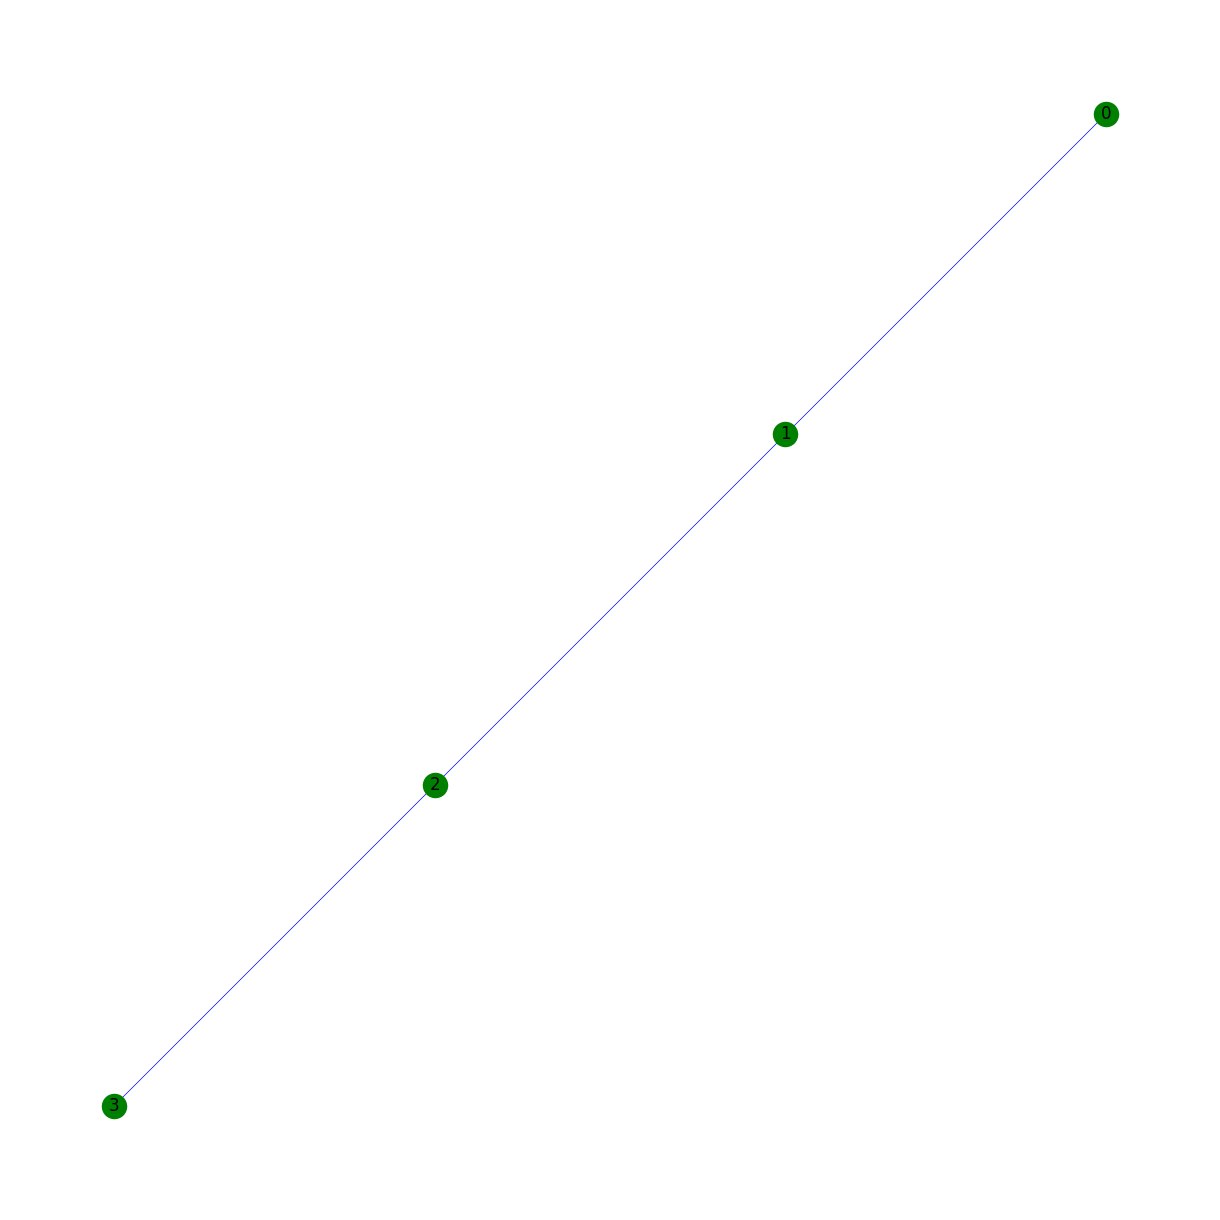

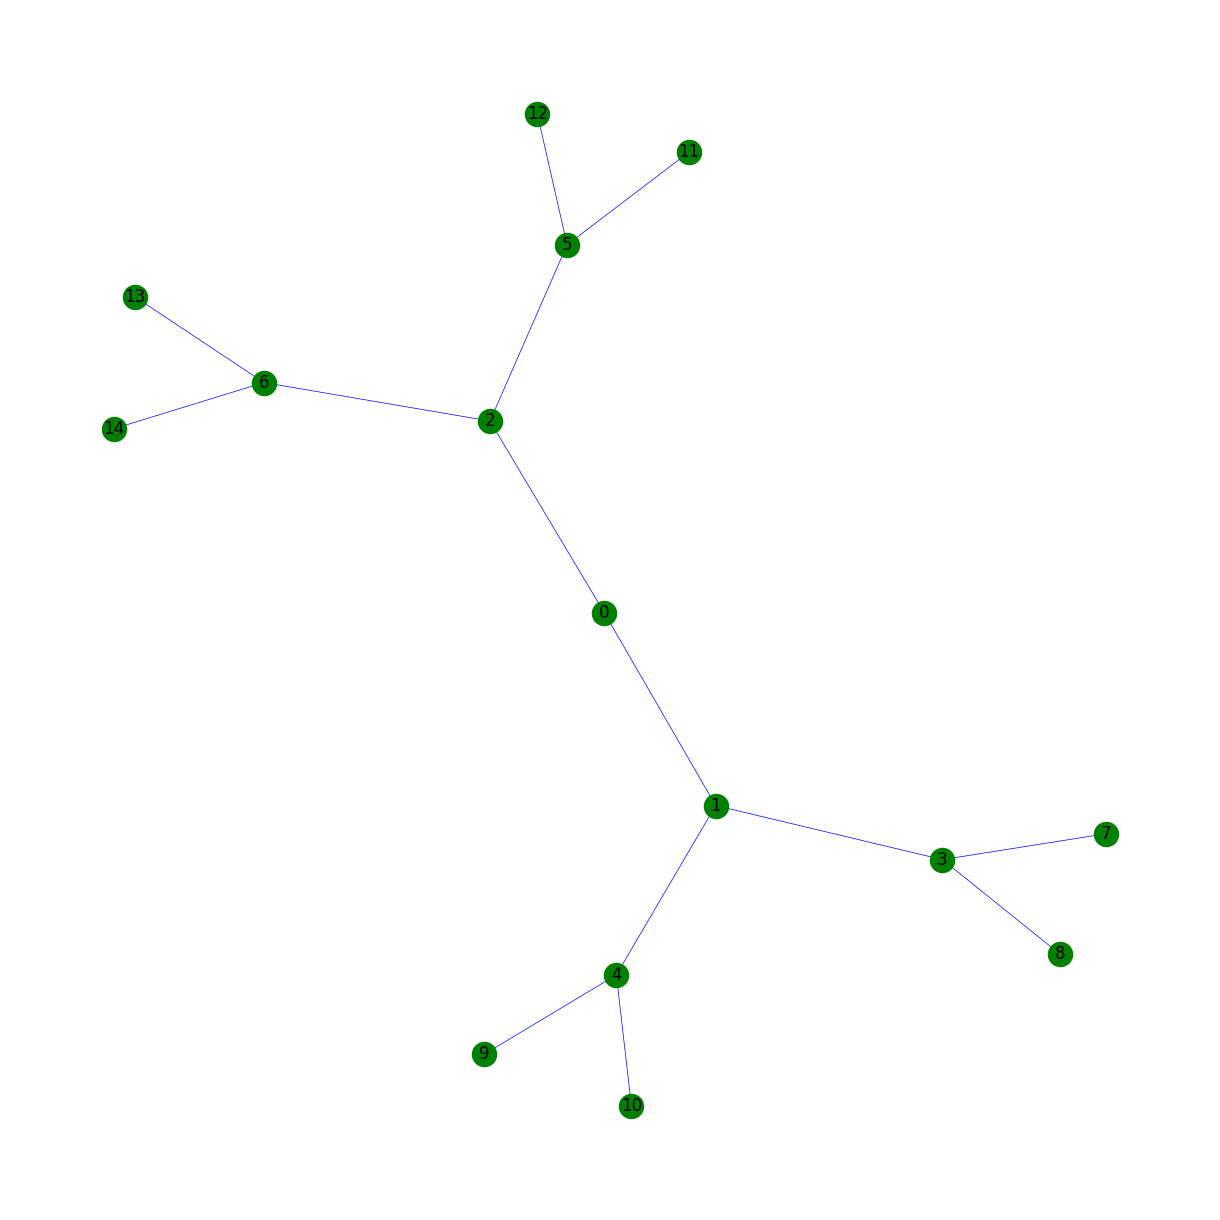

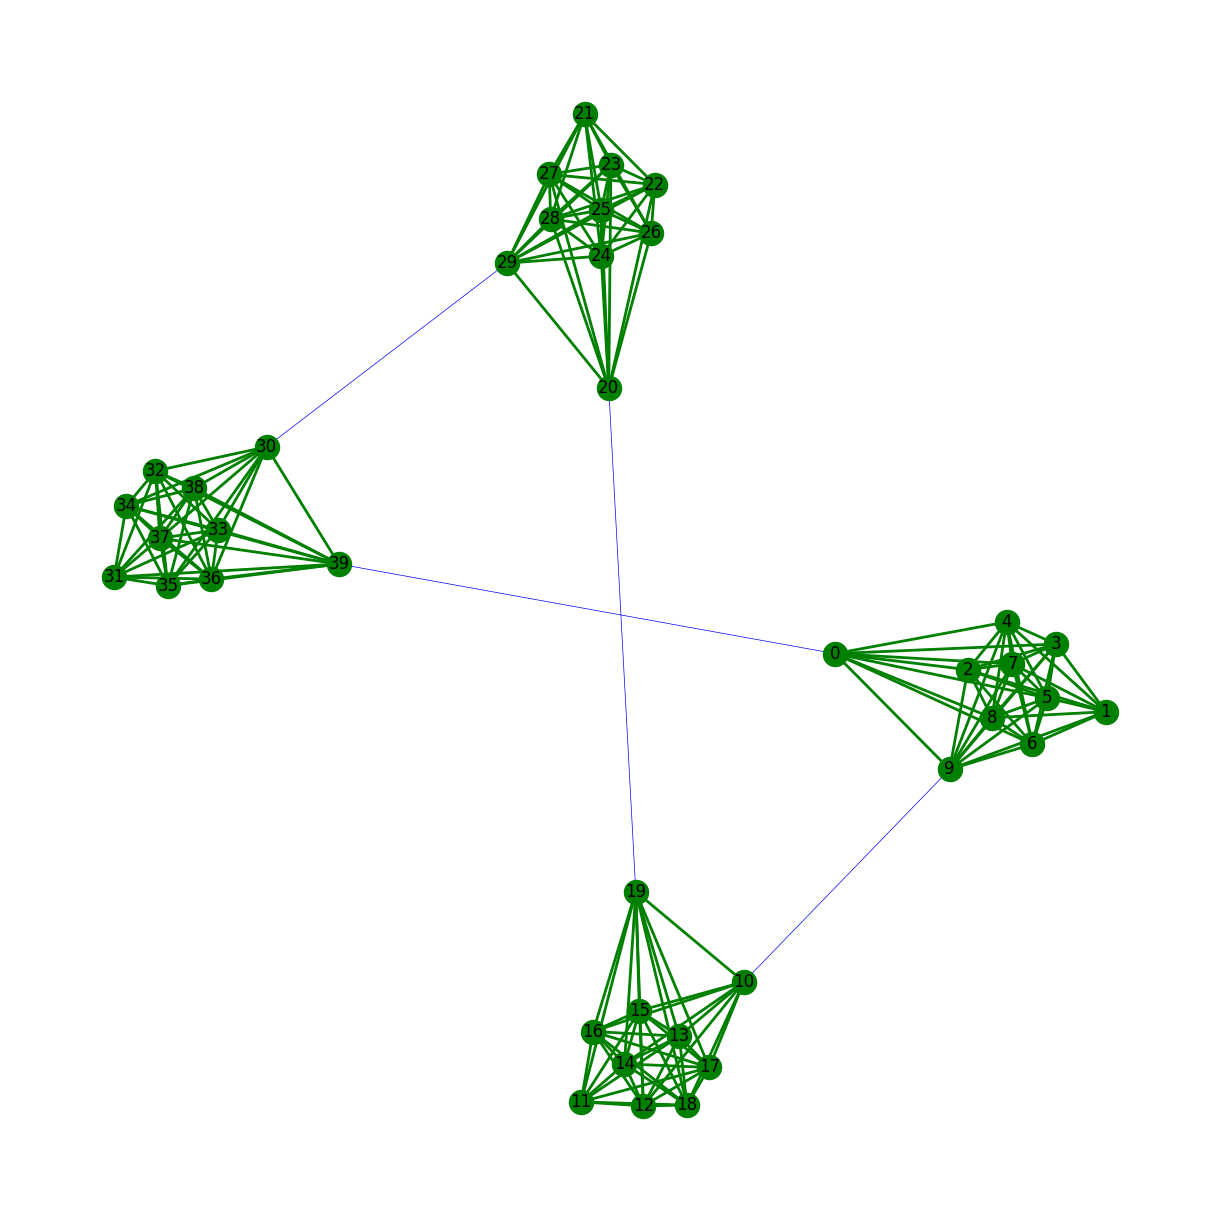

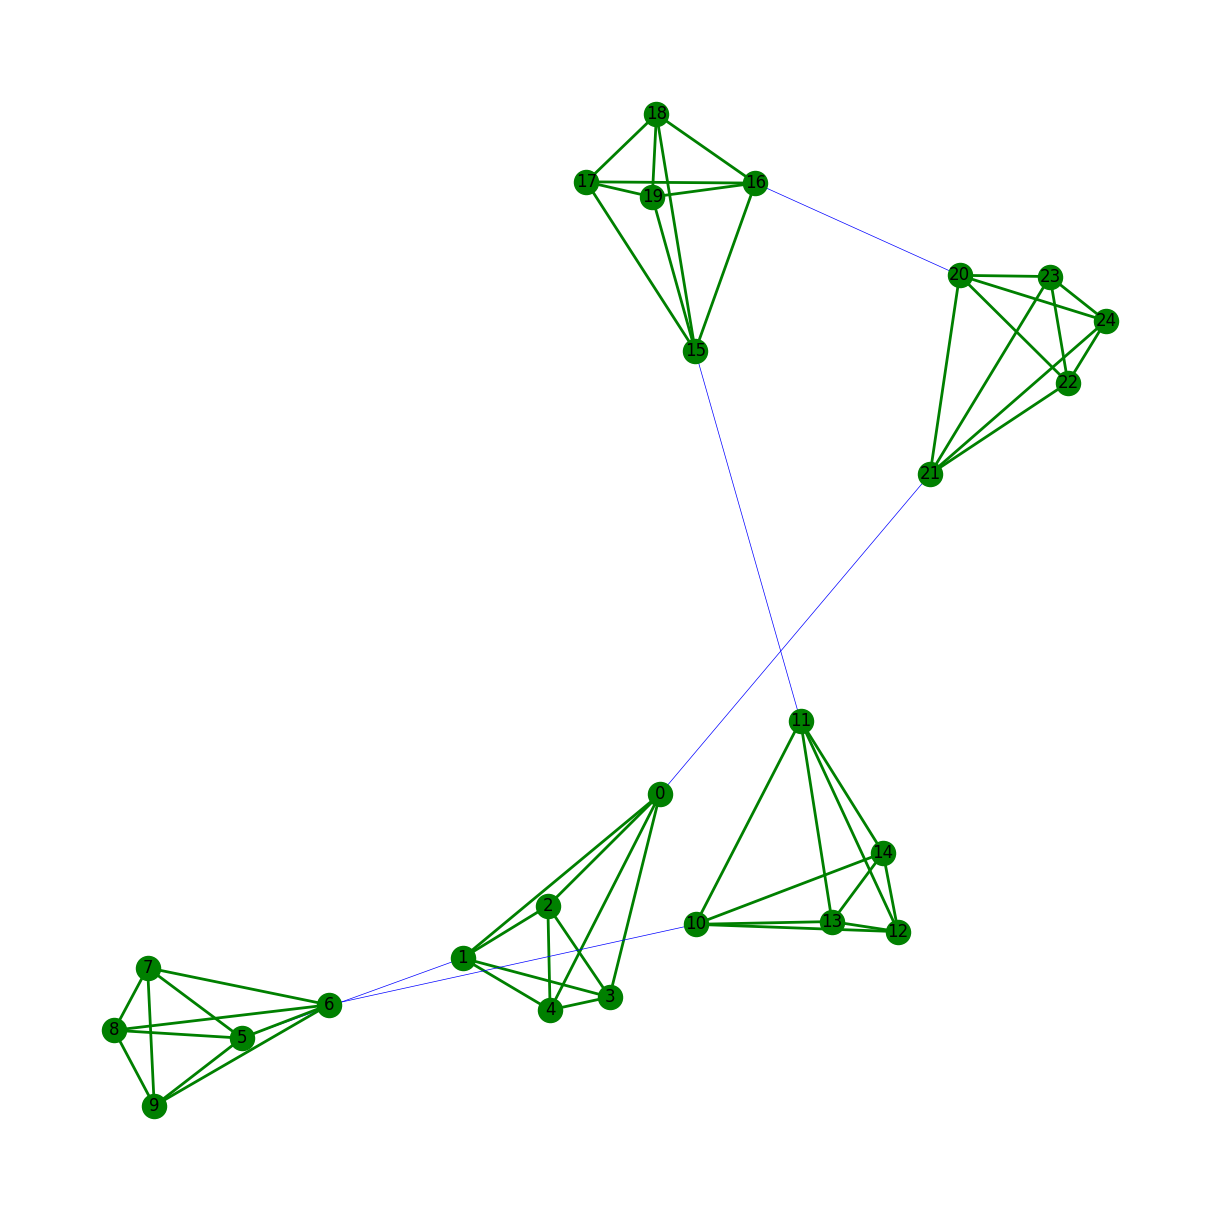

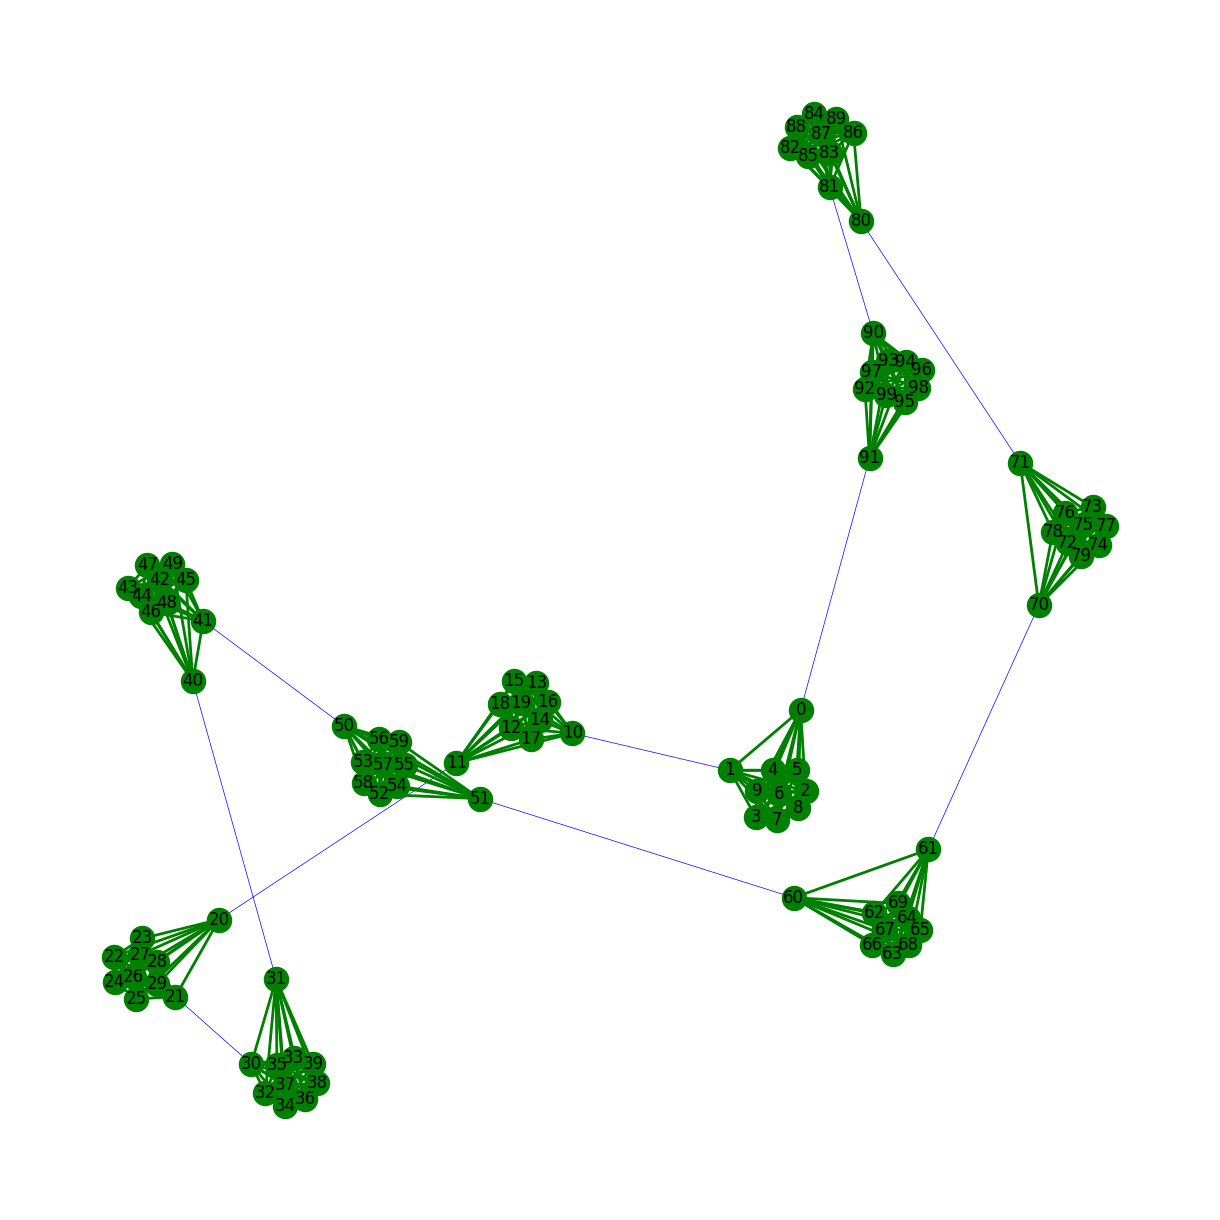

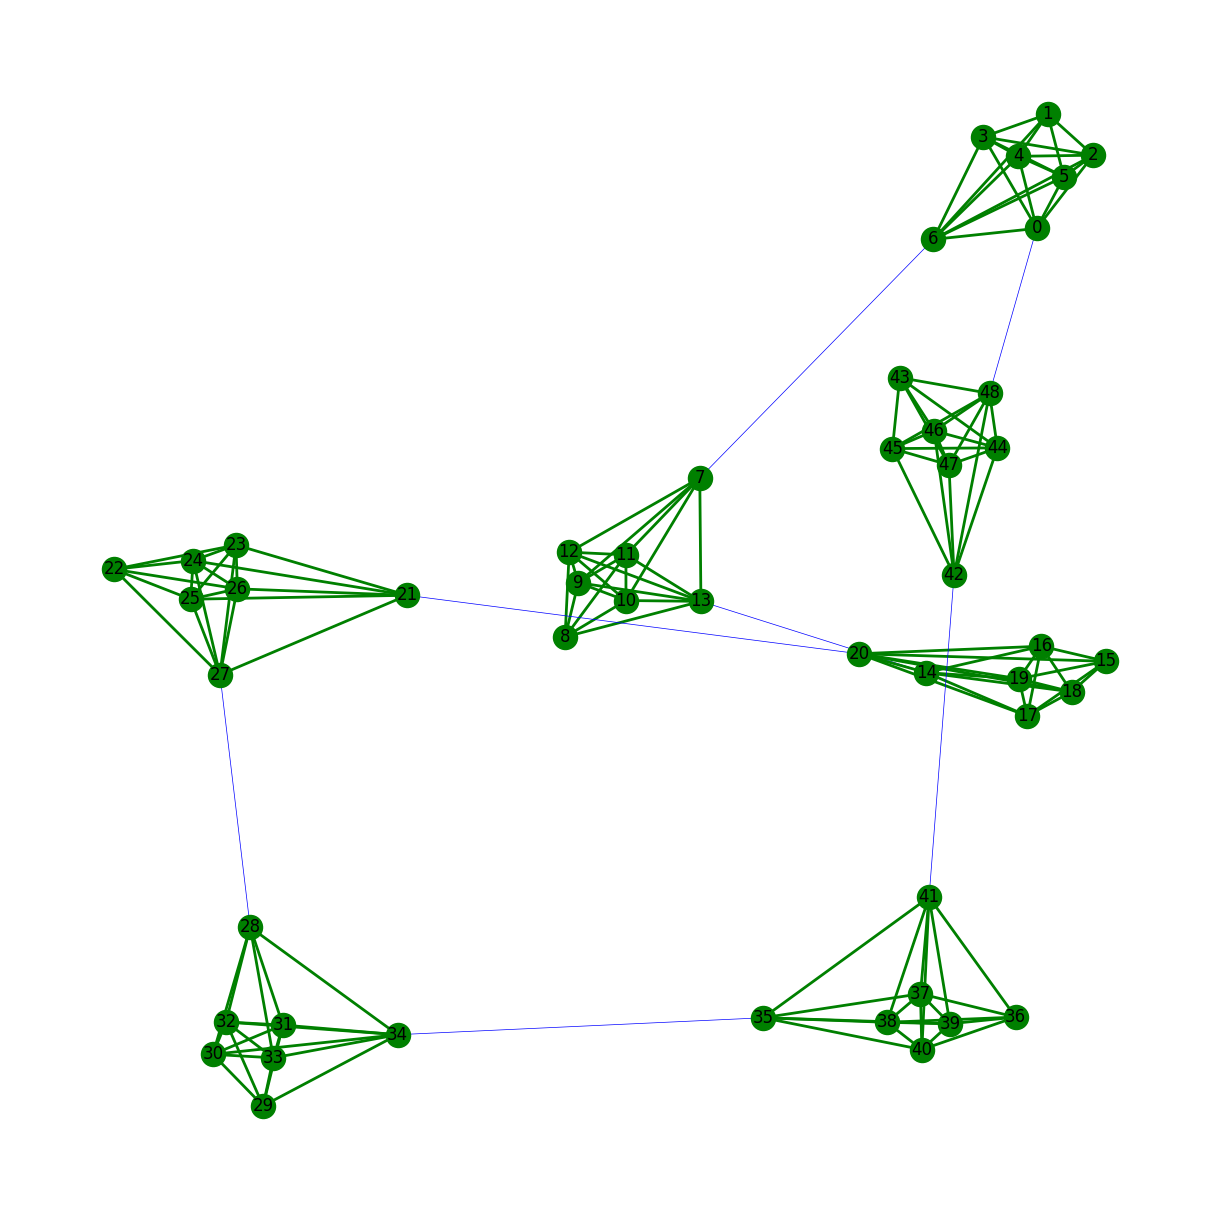

In [39]:
Gs = [nx.balanced_tree(1, 3), nx.balanced_tree(2, 3), nx.connected_caveman_graph(4, 10), nx.ring_of_cliques(5, 5),
      nx.ring_of_cliques(10, 10), nx.connected_caveman_graph(7, 7)]

for i, G in enumerate(Gs):
    plt.figure(figsize=(12, 12))
    plt.figure(1 + i)
    pos = nx.spring_layout(G)
    mark_clusters(G, k=1, threshold=1)
    draw(G, pos)

## Grafy skierowane - TODO

{(0, 1): 0.5,
 (0, 2): 0.5,
 (1, 0): 0.33,
 (1, 3): 0.33,
 (1, 4): 0.33,
 (2, 0): 0.33,
 (2, 5): 0.33,
 (2, 6): 0.33,
 (3, 1): 1.0,
 (4, 1): 1.0,
 (5, 2): 1.0,
 (6, 2): 1.0}

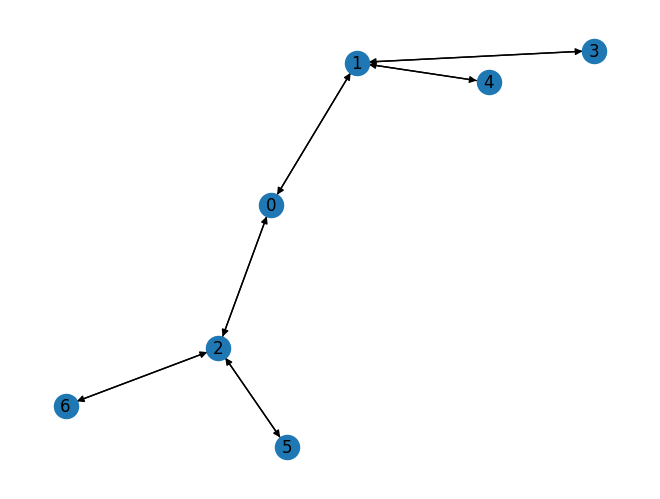

In [40]:
# do wywalenia
G = nx.balanced_tree(2, 2)
pos = nx.spring_layout(G)

A = nx.adjacency_matrix(G)
x, y = A.shape

new_G = nx.DiGraph()
for current_node in range(x):
    for adjacent_node in range(y):
        if A[current_node, adjacent_node] == 1:
            p = round(1 / G.degree(current_node), 2)
            new_G.add_edge(current_node, adjacent_node, weight=p)

pos = nx.spring_layout(new_G)
nx.draw(new_G, pos, with_labels=True)
nx.get_edge_attributes(new_G, 'weight')

In [41]:
# TODO

## Wnioski

- Klastry zostały wykryte poprawnie, dla przykładowych grafów nieskierowanych